In [1]:
#manipulations ko lagi
import pandas as pd
import numpy as np

#data visualization ko lagi
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#first read the data file
df= pd.read_csv('tesla.csv')

#if data set arko format ma xa bhane
#for eg excel data set xa bhane read_excel ane json ma xa bhane 
#read_json function haru use garne

In [4]:
df.shape
#hamro data set ma 1692 rows ra 7 column xa

(1692, 7)

In [6]:
df.head()
#yo function le top 5 rows dekhauxa

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [7]:
#Print summary statistics
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [8]:
#the complete information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [9]:
df.isnull().sum()
#yo function le null value xa ki xaina check garxa
#for eg hamro data set ko column ma kunai ni missing value xaina
# Replace the ' 's with NaN
df = df.replace(" ",np.NaN) #ja ja khali tya nan le replace


# Impute the missing values with mean imputation
df = df.fillna(df.mean())  #ja ja nan bhetinxa tya whole data frame ko mean

# Count the number of NaNs in the dataset to verify
print(df.isnull().values.sum())  

0


C:\Users\bhatt\AppData\Local\Temp\ipykernel_14316\837456432.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())  #ja ja nan bhetinxa tya whole data frame ko mean


<Axes: xlabel='Date', ylabel='Close'>

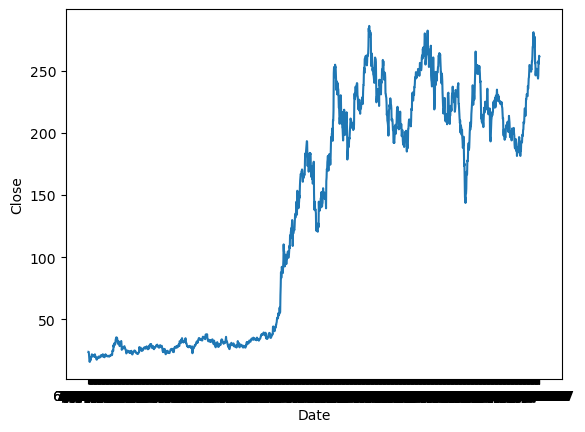

In [10]:
# line plot 
sns.lineplot(x='Date',y='Close', data=df )


<Axes: xlabel='Date', ylabel='Close'>

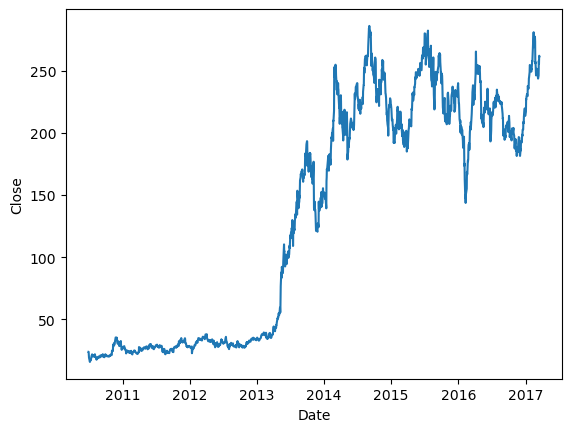

In [11]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format

sns.lineplot(x='Date', y='Close', data=df)


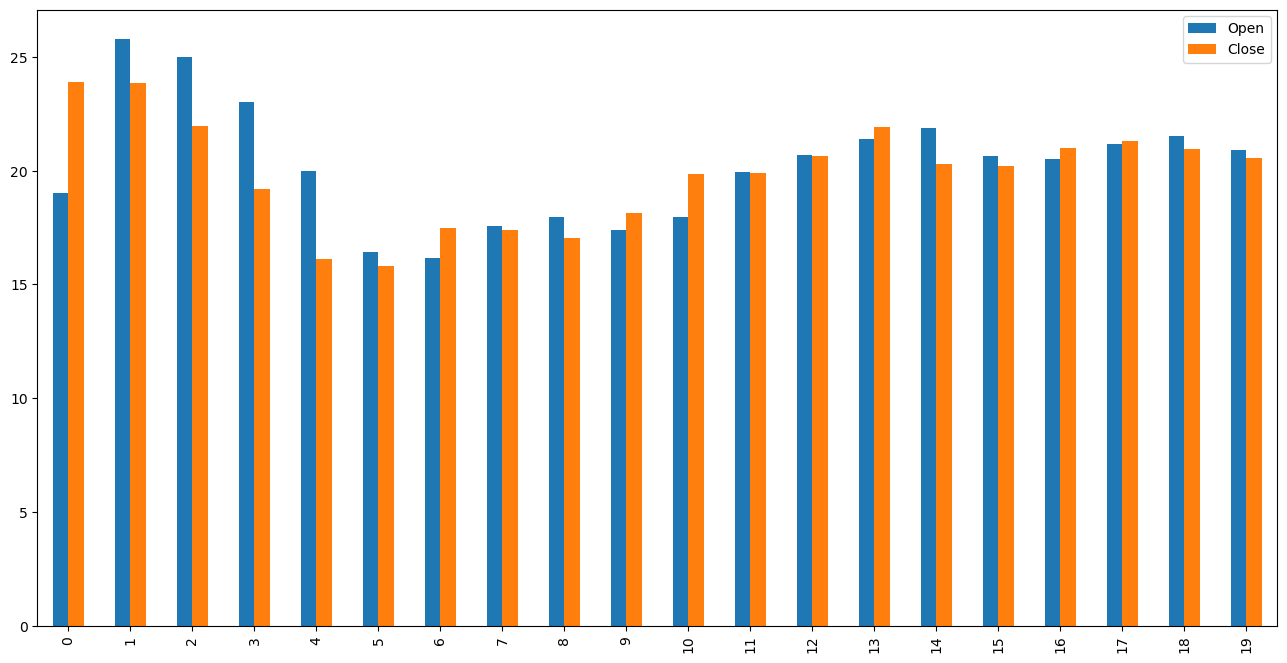

In [12]:
df[['Open', 'Close']].head(20).plot(kind='bar', figsize=(16, 8), grid=False)
plt.show()


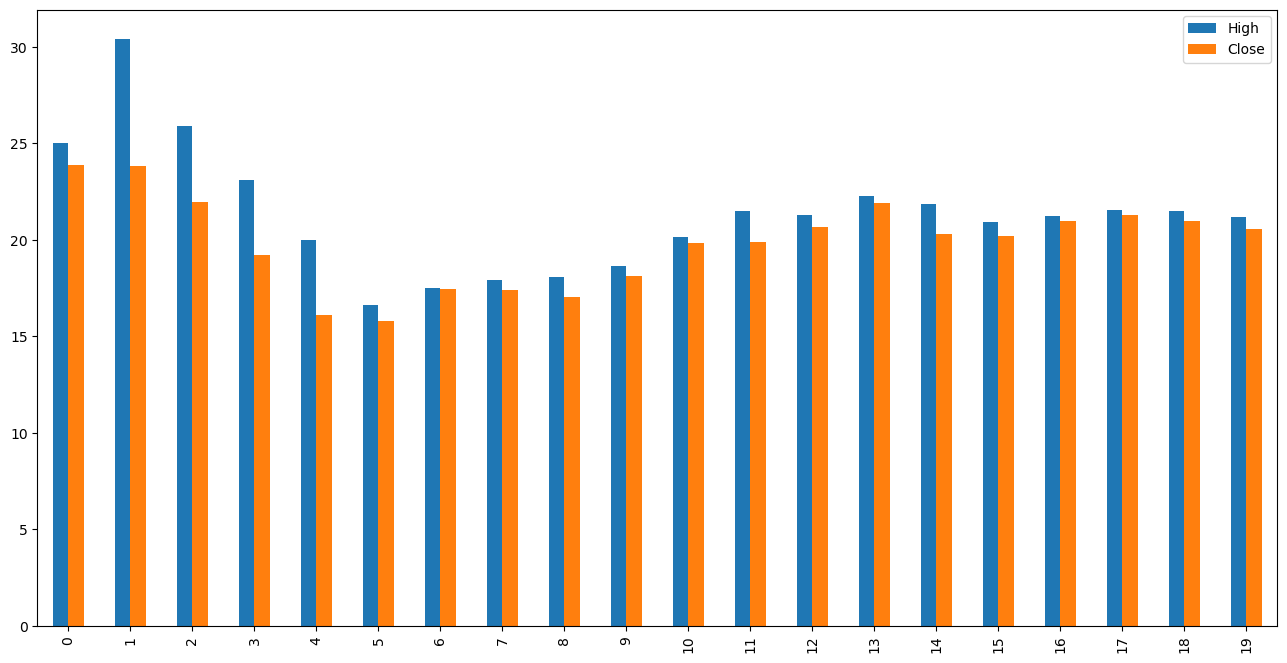

In [13]:
df[['High', 'Close']].head(20).plot(kind='bar', figsize=(16, 8), grid=False)
plt.show()

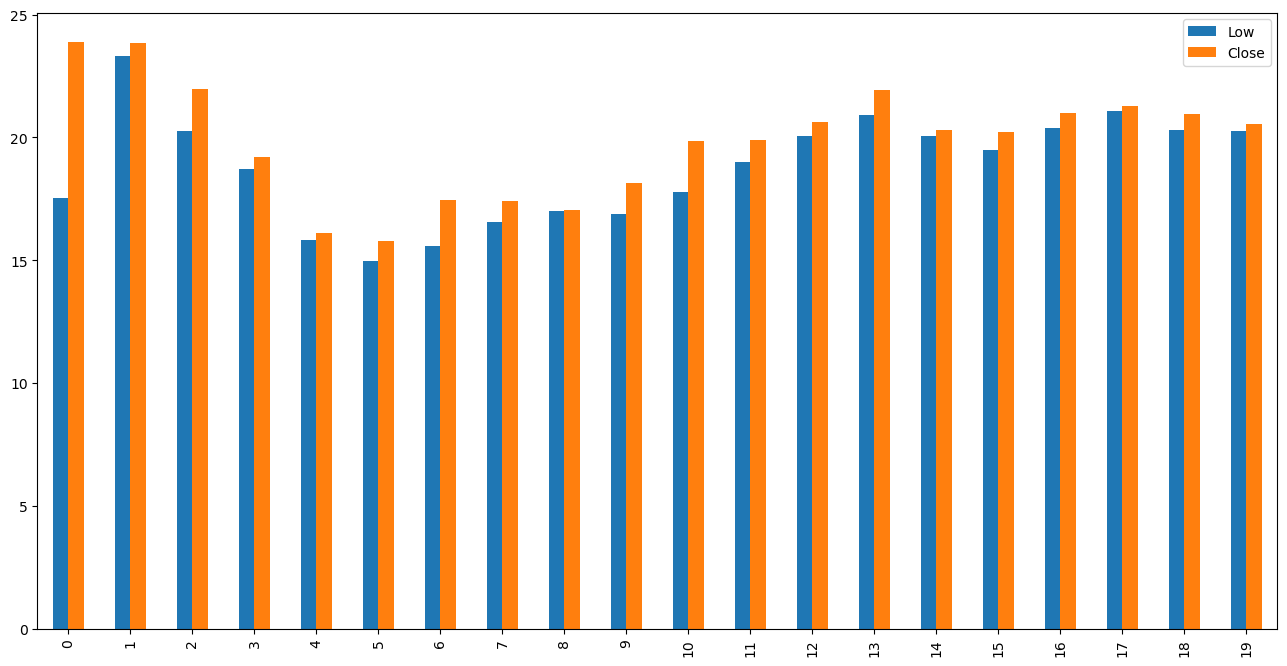

In [14]:
df[['Low', 'Close']].head(20).plot(kind='bar', figsize=(16, 8), grid=False)
plt.show()


Text(0, 0.5, 'Price')

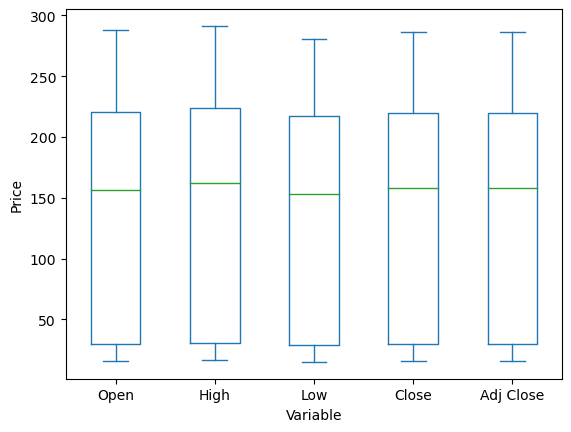

In [15]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')
plt.xlabel('Variable')
plt.ylabel('Price')

#the plot() function is used to create a box plot for selected columns ('Open', 'High', 'Low', 'Close', and 'Adj Close') from the DataFrame. 
#The x-axis label is set as 'Variable' and the y-axis label is set as 'Price'
#using plt.xlabel() and plt.ylabel() functions respectively.

C:\Users\bhatt\AppData\Local\Temp\ipykernel_14316\1752742378.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


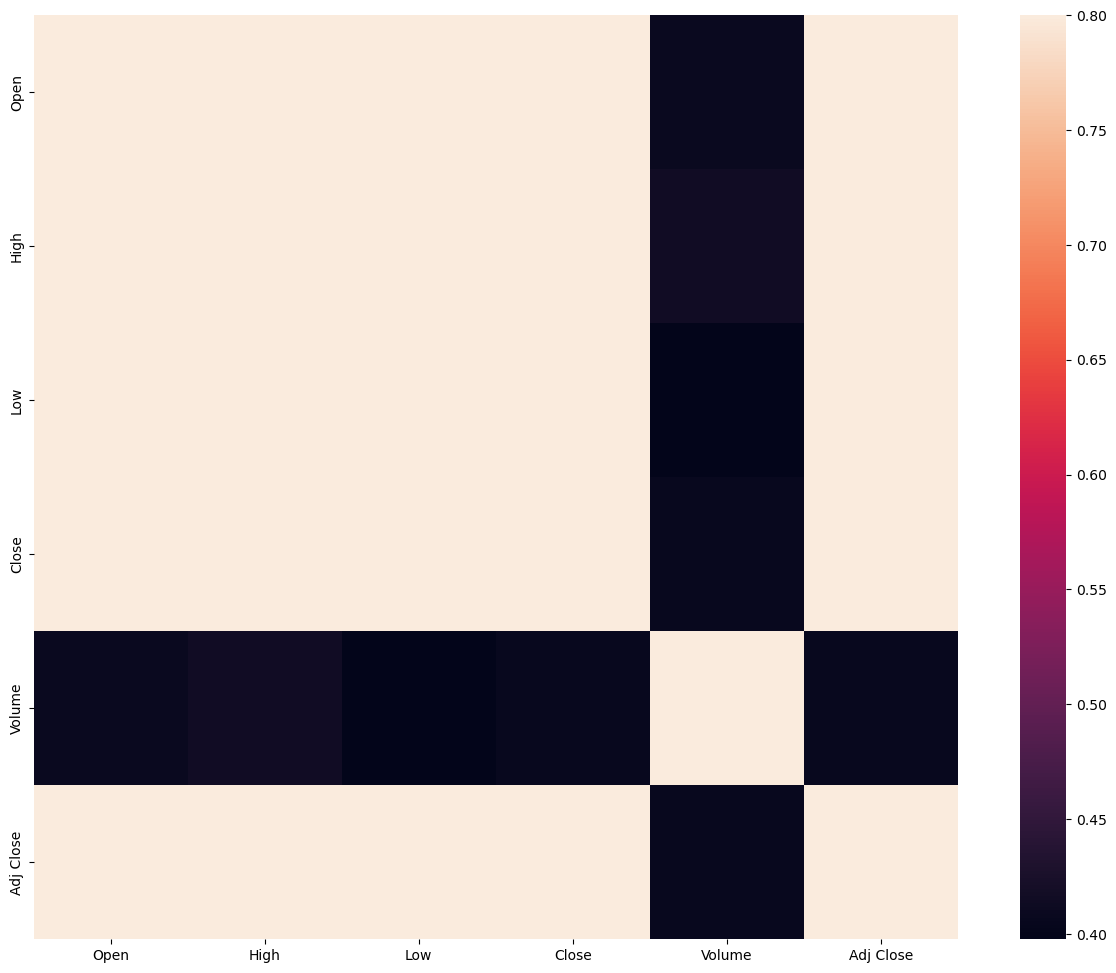

In [16]:
#this is heat map pearson correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

C:\Users\bhatt\AppData\Local\Temp\ipykernel_14316\4218888453.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


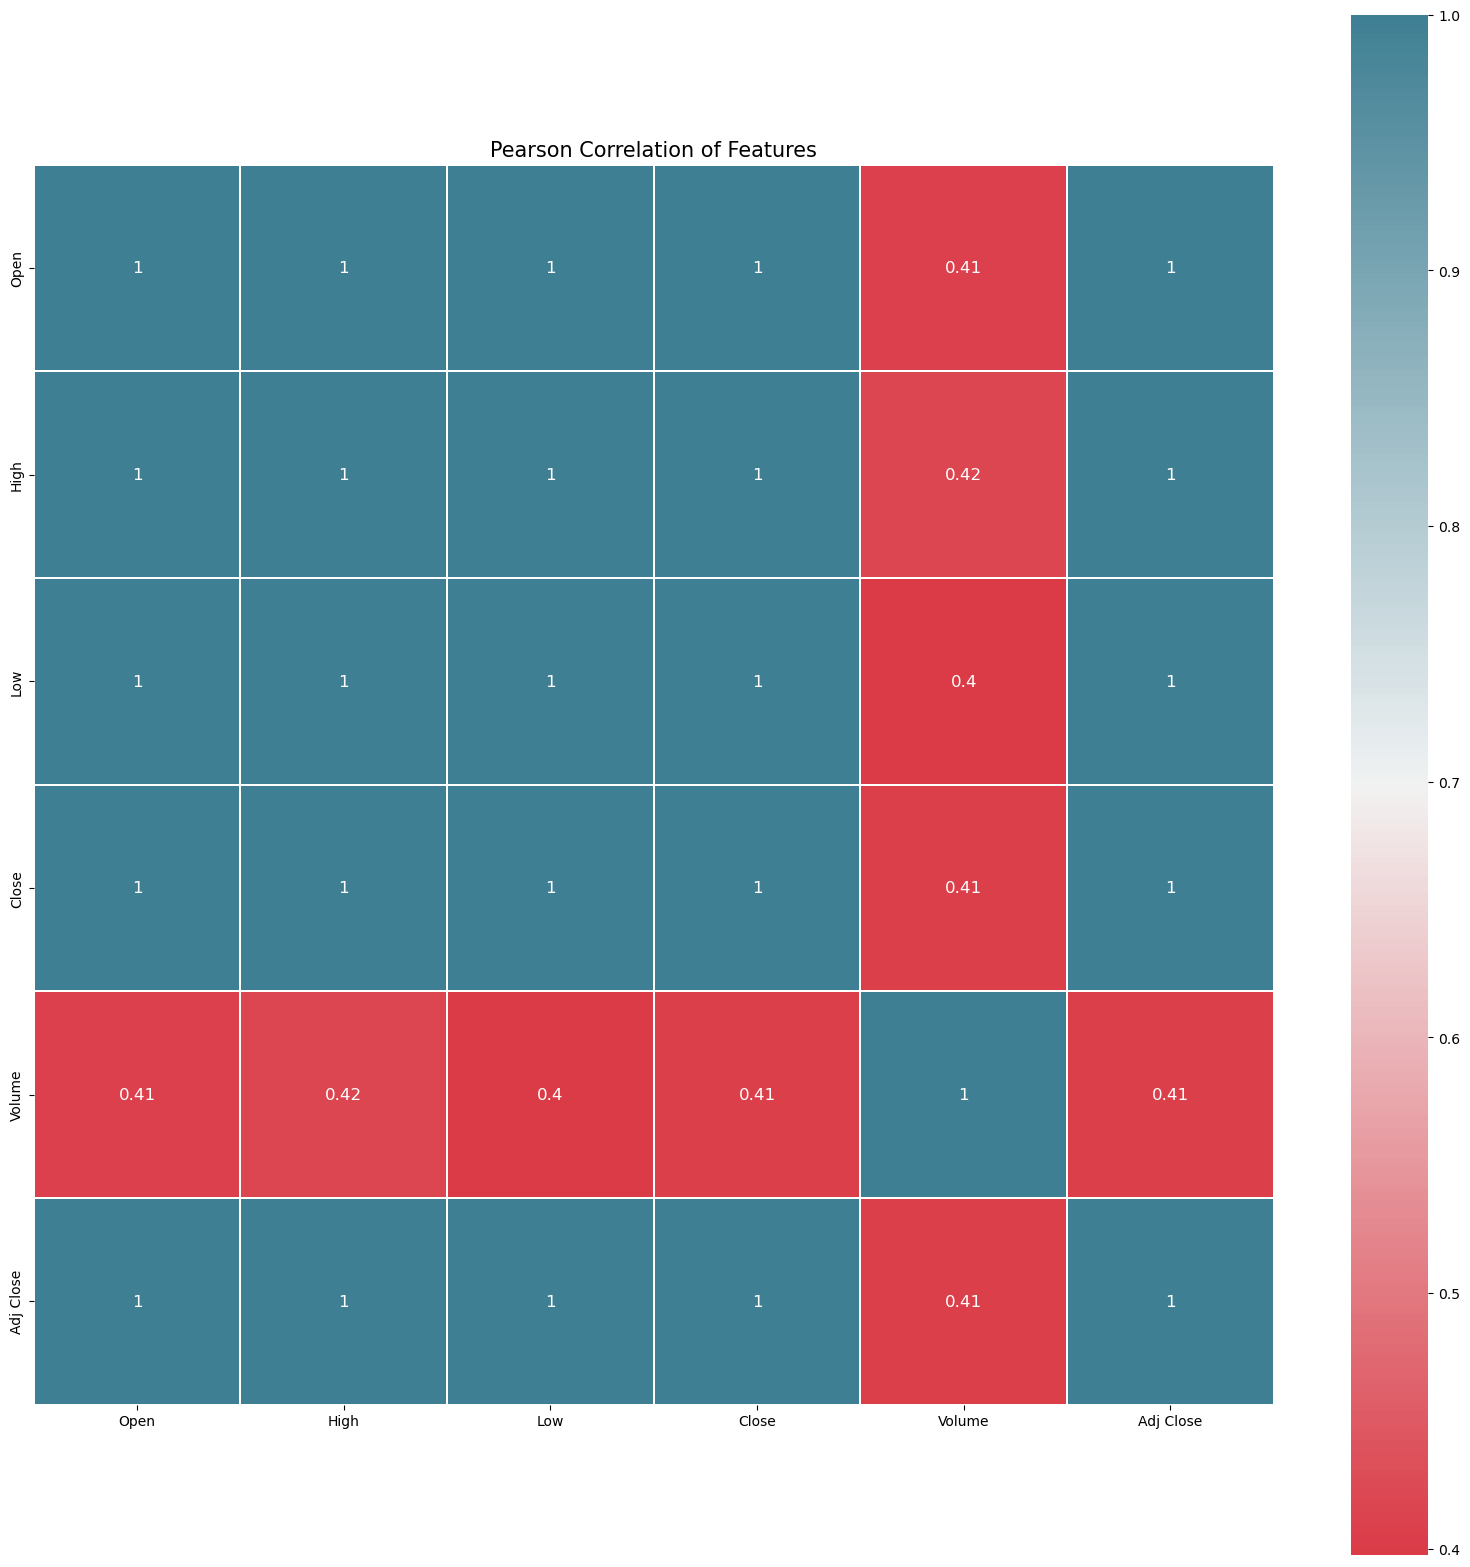

In [17]:
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(df.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

In [87]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

## Create a KNN classifier with k=3
knn_regressor = KNeighborsRegressor(n_neighbors=3)

## Train the model
knn_model = knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_knn_pred = knn_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_knn_pred)
print("Mean Squared Error:", mse)




Mean Squared Error: 3789.103849897323


In [88]:
#knn cross validation
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(knn_model, X, y, cv=5)
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Score:", cv_scores.mean())

Cross-Validation Scores: [-354.47052027 -465.34690158   -0.86953091   -9.93362083   -9.62109454]
Mean Score: -168.04833362415465


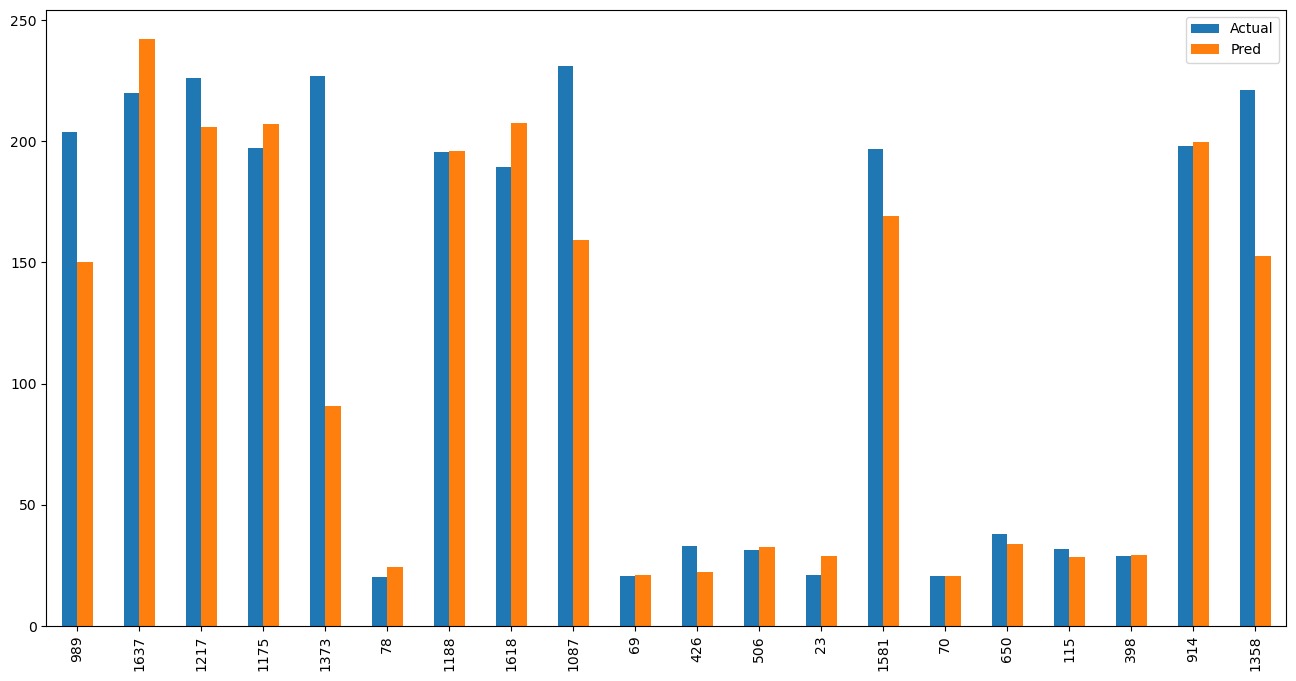

In [83]:
# Create a DataFrame for plotting
plot_knn_df = pd.DataFrame({'Actual': y_test, 'Pred': y_knn_pred})
plot_knn_df.head(20).plot(kind='bar', figsize=(16, 8))
plt.show()

In [84]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the tesla dataset
df = pd.read_csv("tesla.csv")

# Replace the dataset and target variables with your own data
X = df[['Open', 'High', 'Low', 'Volume', 'Adj Close']]
y = df['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
predictions = linear_reg.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.945017309531582e-25


In [85]:
from sklearn.model_selection import cross_val_score

# Create a Linear Regression model
linear_reg = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(linear_reg, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Score:", cv_scores.mean())


#yaha LinearRegression model object create gareko xu
#cross_val_score function is used to perform cross-validation. 
#We pass the model (linear_reg), input features (X), and target variable (y) as arguments. 
#The cv parameter is set to 5, which indicates 5-fold cross-validation.
#The cross-validation scores are stored in cv_scores.
#Finally, we print the cross-validation scores and the mean score across all folds.



#In the context of cross-validation,
#a mean score of 1 typically implies that the model has achieved perfect accuracy on the given dataset.

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0


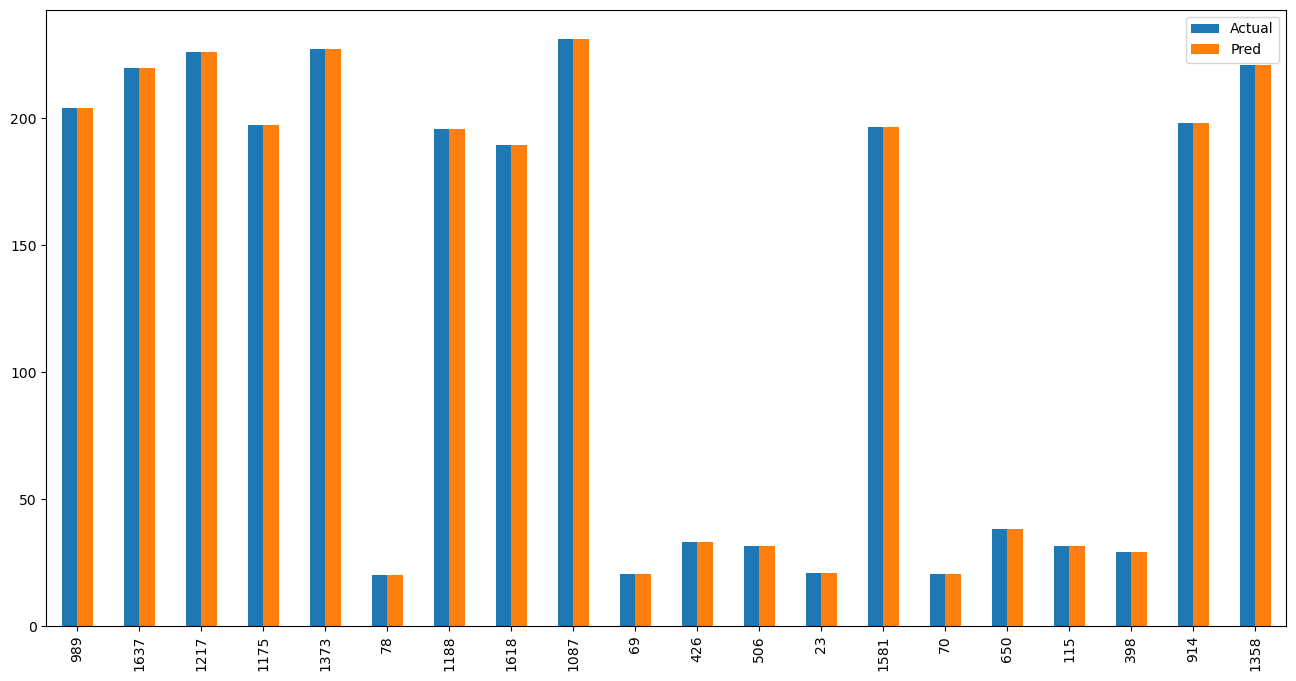

In [79]:
# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Actual': y_test, 'Pred':predictions})

# Plot the first 20 rows of the DataFrame
plot_df.head(20).plot(kind='bar', figsize=(16, 8), grid=False)

# Display the plot
plt.show()


In [86]:
#R2 or r-squared error

from sklearn.metrics import r2_score

print('Linear R2:', r2_score(y_test,predictions))
print('KNN R2:', r2_score(y_test, y_knn_pred))

#An R2 score of 0.9997856045881768 for the Linear Regression model 
#and an R2 score of 0.9993778768337891 for the KNN Regression model 
#indicate that both models have a very high level of performance
#and can effectively explain the variance in the target variable.

Linear R2: 1.0
KNN R2: 0.5937003980876887
